In [224]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import numpy as np
pd.pandas.set_option("display.max_columns",None)
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [225]:
df1=pd.read_csv("C:/Users/rajes/Downloads/archive (2)/spotify-2023.csv",encoding= 'unicode_escape')#Change this path according to your system

In [226]:
df1.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [227]:
df1.shape

(953, 24)

In [228]:
print("Input Features in this dataset are:")
count=1
print("")
print("S.no"," ","Feature name"," ","Datatypes")
for i,j in zip(df1.columns,df1.dtypes):
    if i!="streams":
        print(count,'.',i," ",j)
        count=count+1    
print("Output Feature in this dataset is:streams int64")        

Input Features in this dataset are:

S.no   Feature name   Datatypes
1 . track_name   object
2 . artist(s)_name   object
3 . artist_count   int64
4 . released_year   int64
5 . released_month   int64
6 . released_day   int64
7 . in_spotify_playlists   int64
8 . in_spotify_charts   int64
9 . in_apple_playlists   int64
10 . in_apple_charts   int64
11 . in_deezer_playlists   object
12 . in_deezer_charts   int64
13 . in_shazam_charts   object
14 . bpm   int64
15 . key   object
16 . mode   object
17 . danceability_%   int64
18 . valence_%   int64
19 . energy_%   int64
20 . acousticness_%   int64
21 . instrumentalness_%   int64
22 . liveness_%   int64
23 . speechiness_%   int64
Output Feature in this dataset is:streams int64


<b>track_name</b>: Name of the song
    
<b>artist(s)_name</b>: Name of the artist(s) of the song
    
<b>artist_count</b>: Number of artists contributing to the song
    
<b>released_year</b>: Year when the song was released
    
<b>released_month</b>: Month when the song was released
    
<b>released_day</b>: Day of the month when the song was released
    
<b>in_spotify_playlists</b>: Number of Spotify playlists the song is included in
    
<b>in_spotify_charts</b>: Presence and rank of the song on Spotify charts
    
<b>streams</b>: Total number of streams on Spotify
    
<b>in_apple_playlists</b>: Number of Apple Music playlists the song is included in
    
<b>in_apple_charts</b>: Presence and rank of the song on Apple Music charts
    
<b>in_deezer_playlists</b>: Number of Deezer playlists the song is included in
    
<b>in_deezer_charts</b>: Presence and rank of the song on Deezer charts
    
<b>in_shazam_charts</b>: Presence and rank of the song on Shazam charts
    
<b>bpm</b>: Beats per minute, a measure of song tempo
    
<b>key</b>: Key of the song
    
<b>mode</b>: Mode of the song (major or minor)
    
<b>danceability_%</b>: Percentage indicating how suitable the song is for dancing
    
<b>valence_%</b>: Positivity of the song's musical content
    
<b>energy_%</b>: Perceived energy level of the song
    
<b>acousticness_%</b>: Amount of acoustic sound in the song
    
<b>instrumentalness_%</b>: Amount of instrumental content in the song
    
<b>liveness_%</b>: Presence of live performance elements
    
<b>speechiness_%</b>: Amount of spoken words in the song

In [229]:
df1.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [230]:
df1.isna().sum()
#The missing value features in this dataset are in_shazam_charts and key

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [231]:
df1["in_shazam_charts"] = pd.to_numeric(df1["in_shazam_charts"].str.replace(',', ''), errors='coerce', downcast='integer')
df1["in_deezer_playlists"] = pd.to_numeric(df1["in_deezer_playlists"].str.replace(',', ''), errors='coerce', downcast='integer')

This two columns are numeric values but they were filled in a string format included with commas so we converted them into integer again


In [232]:
numerical_features=[]
for feature in df1.columns:
    if df1[feature].dtypes!='O':
        numerical_features.append(feature)

This code will give numerical features from dataframe

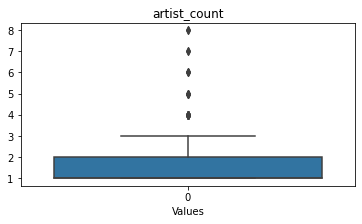

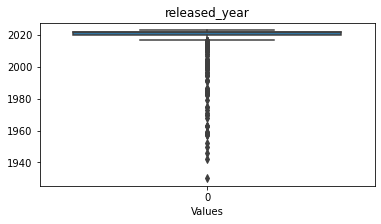

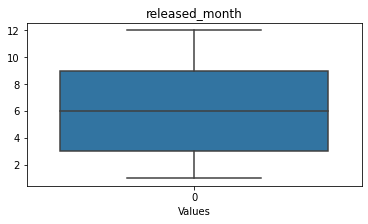

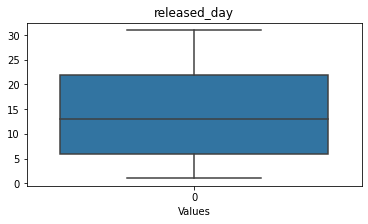

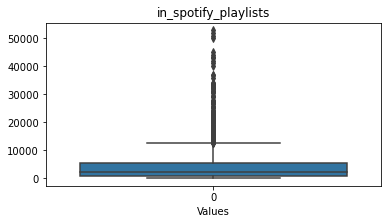

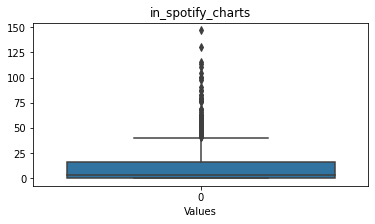

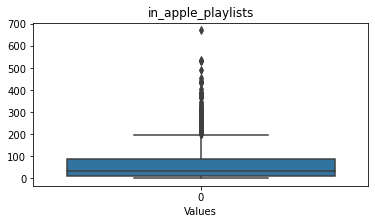

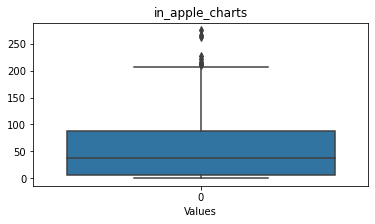

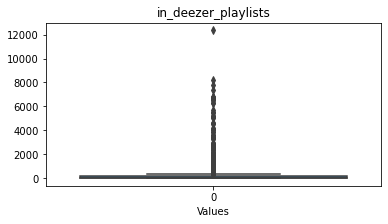

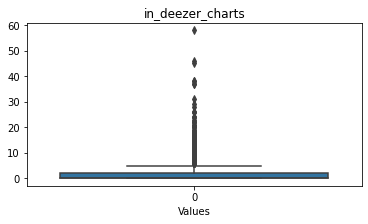

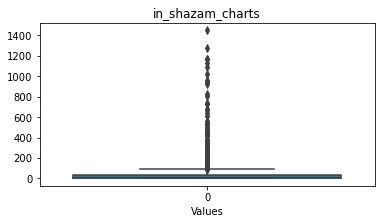

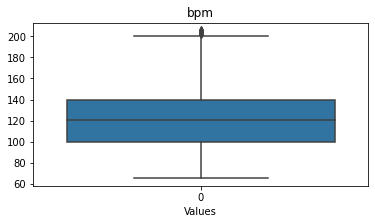

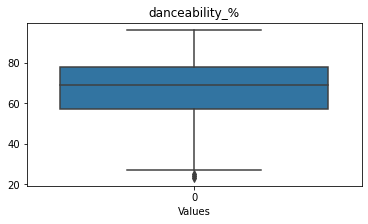

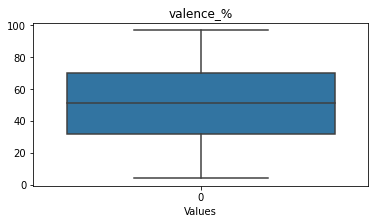

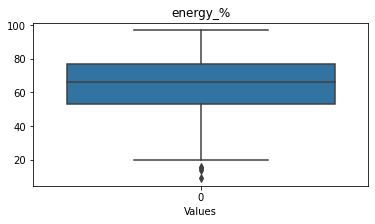

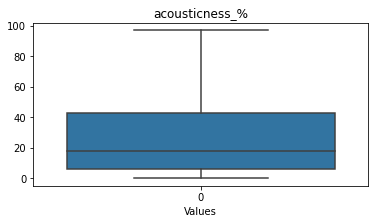

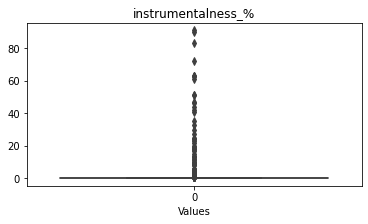

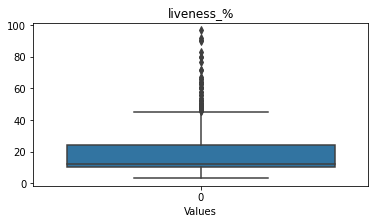

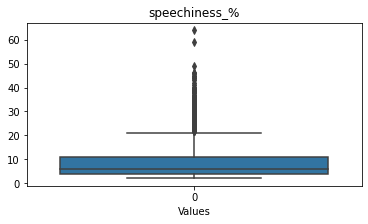

In [233]:
for feature in numerical_features:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df1[feature],orient='v')
    plt.title(feature)
    plt.xlabel("Values")
    plt.show()

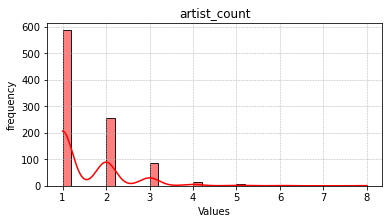

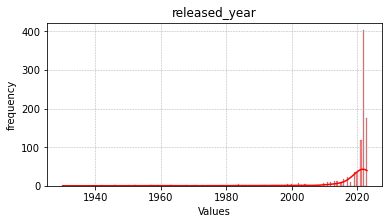

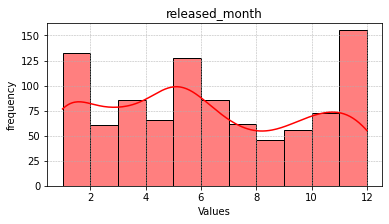

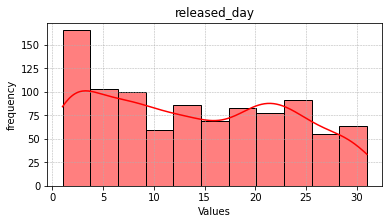

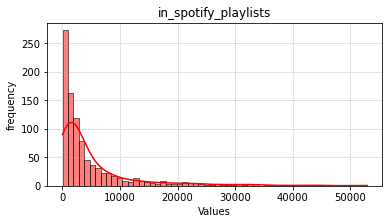

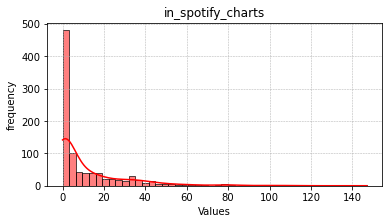

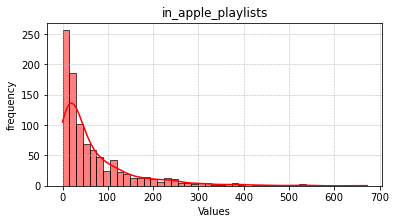

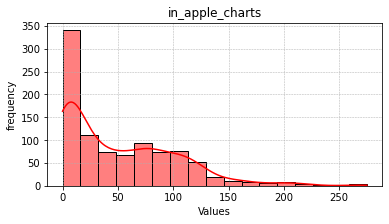

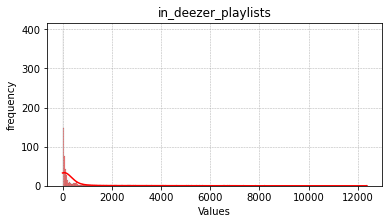

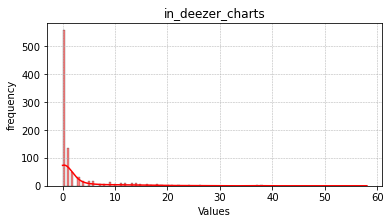

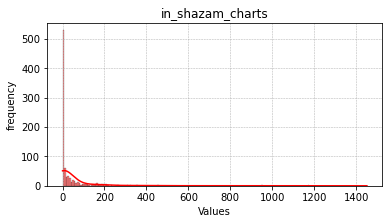

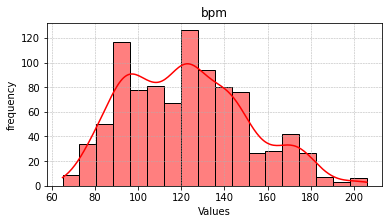

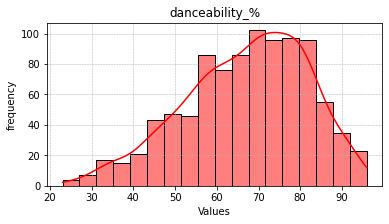

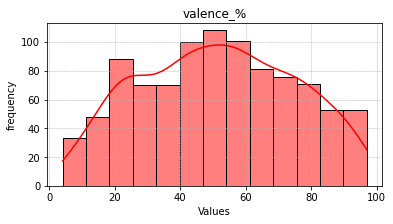

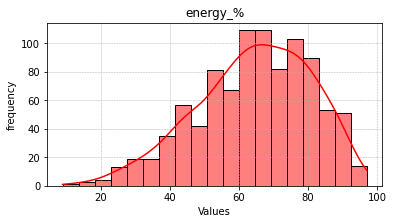

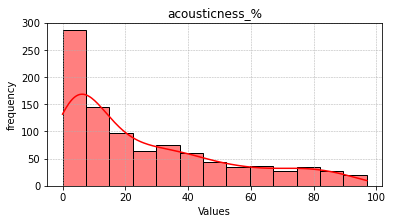

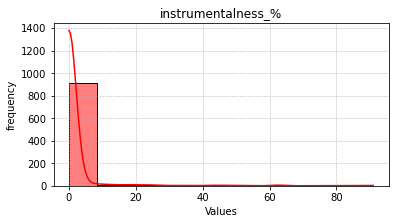

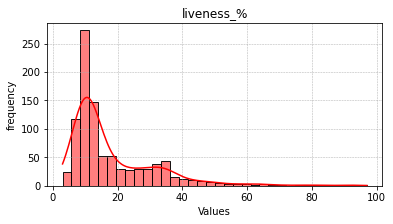

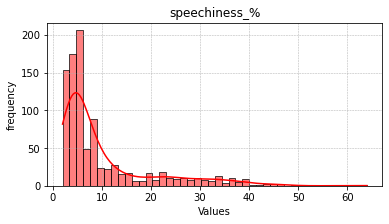

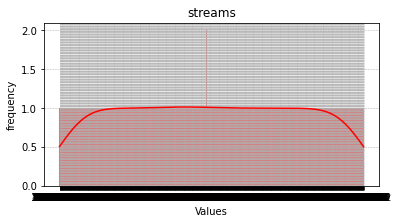

In [247]:
for feature in df3:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df3[feature],kde=True,color='red')
    plt.title(feature)
    plt.xlabel("Values")
    plt.ylabel("frequency")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
    

- It looks like most of the songs were create by 1 artist or a group of 2 artists there are very less songs which were created by group more than 2

- It looks like most of the songs in this data are from 2000 there are very less songs in this data which are before 2000

- It looks like most of the songs released in this data are released in between in january-febrauary or in between November-december

- It looks like most of the songs in spotify are there in between 1-10000 playlist after that there are very less songs which we can see where are there in more than 10000 playlists

- The playlist data in apple music is less compared to spotify playlists data and sezzer playlist data

- It looks like all the playlist data are following powerlaw distribution

- It looks like most of the songs in this data are using less than 10 words in  their songs

- energy data  is very close to fallowing normal distribution

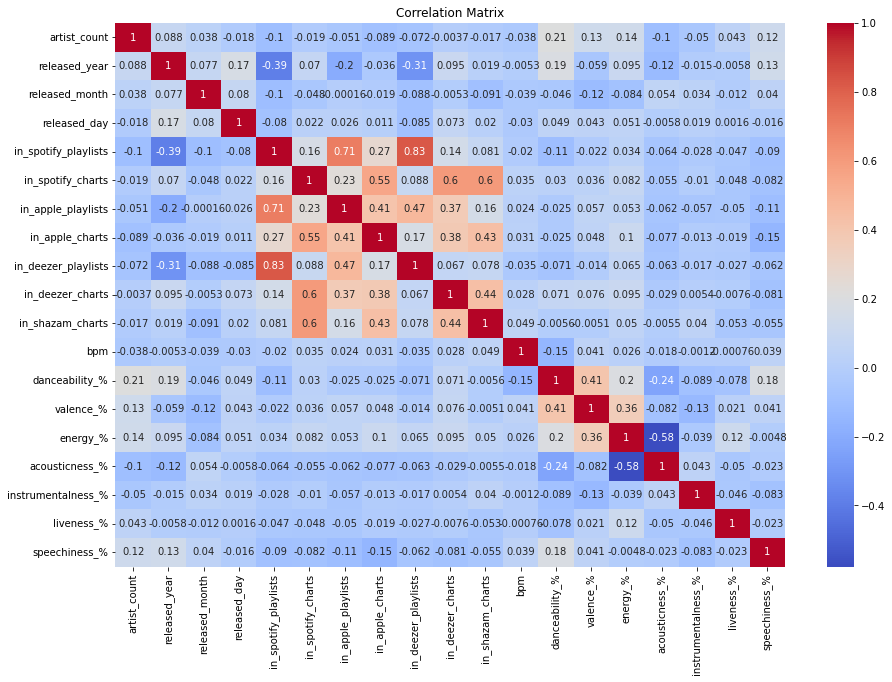

In [236]:

numeric_data = df1.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

- All the data related to playlists  like spotify playlists ,Apple playlists ,Dezzer playlists are positively corealted which tells that a song which is popular among playlists in one platform is popular in other platform playlists also

- All the data related to ranking like spotify charts,Apple charts ,Dezzer charts ,shazam charts are positively coralated which tells that a song popular in platform is most of the times popular in the other platforms also

- We can see a positive corelation between danceablity,valency,energy also which tells us a song with good valency may have high   energy and dancebility value and vice versa

- accousticness and energy are highly negative correalted Which implies songs eith high accousticness have less energy levels in them

- And It looks like accousticness is negatively correalted with many other features in the data 

- All the types of playlists data is negatively correlated with released year 

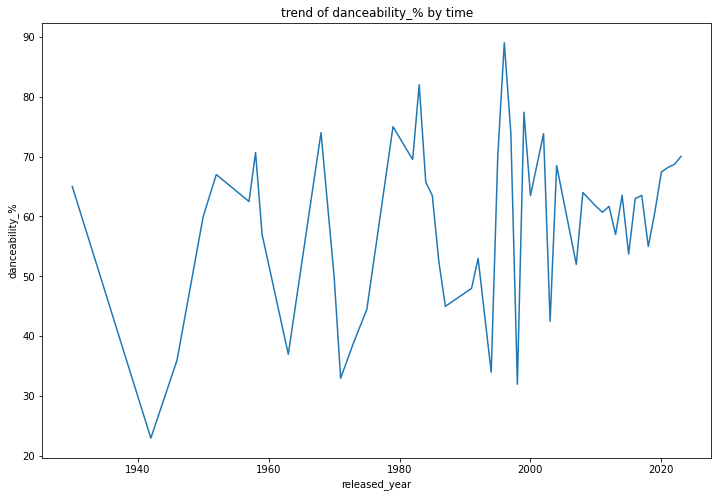

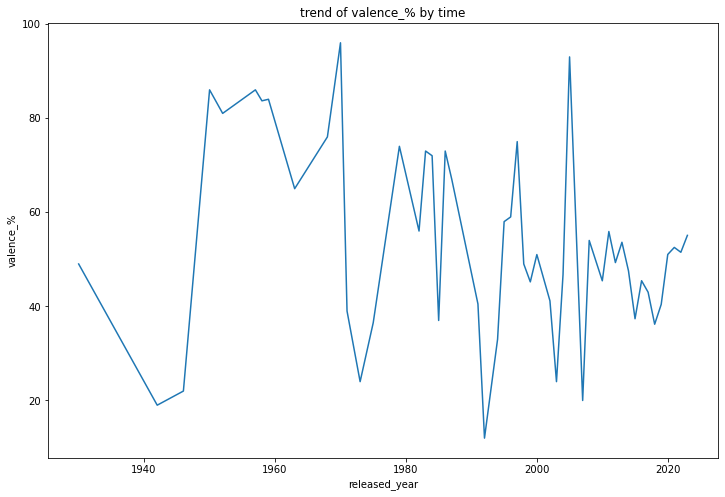

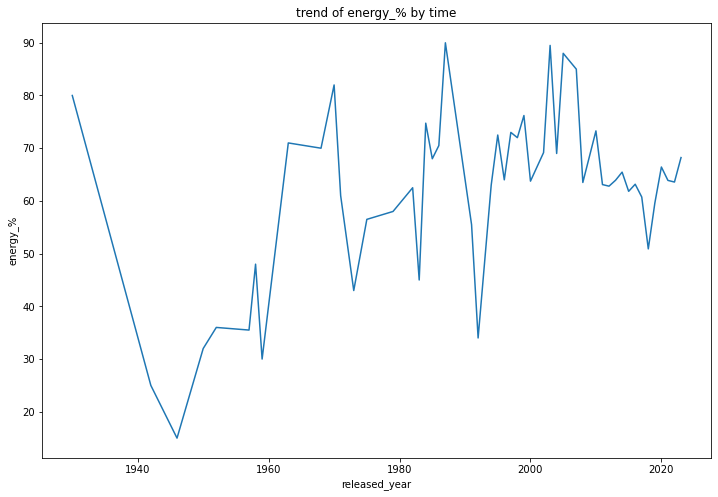

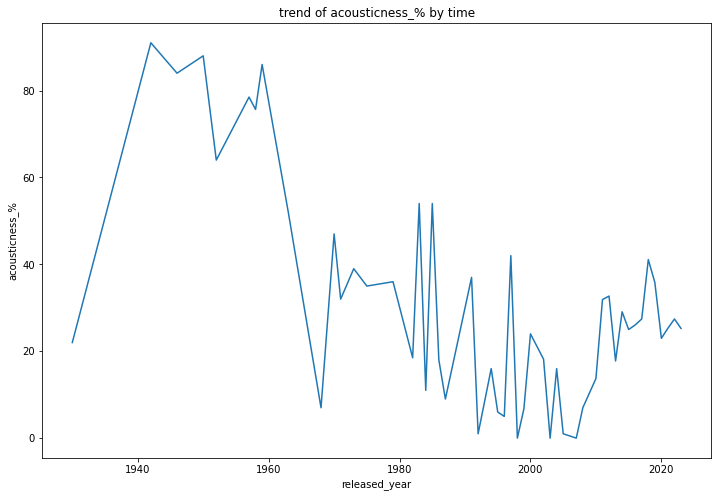

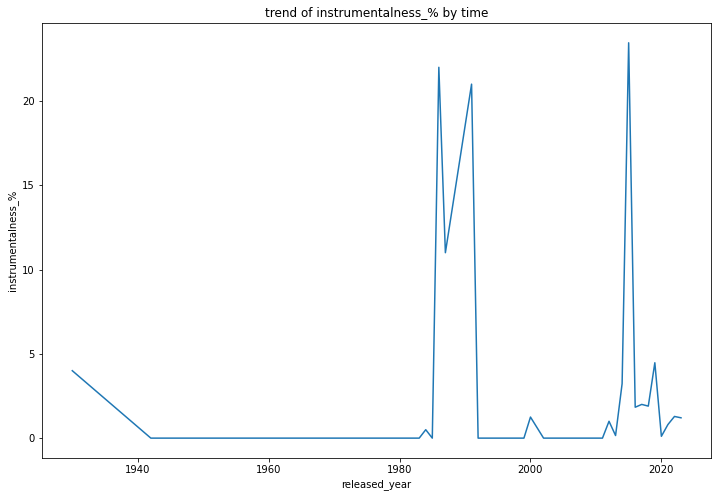

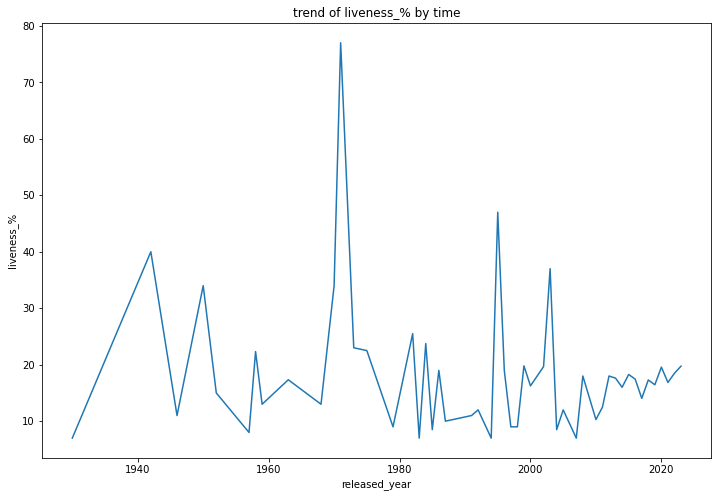

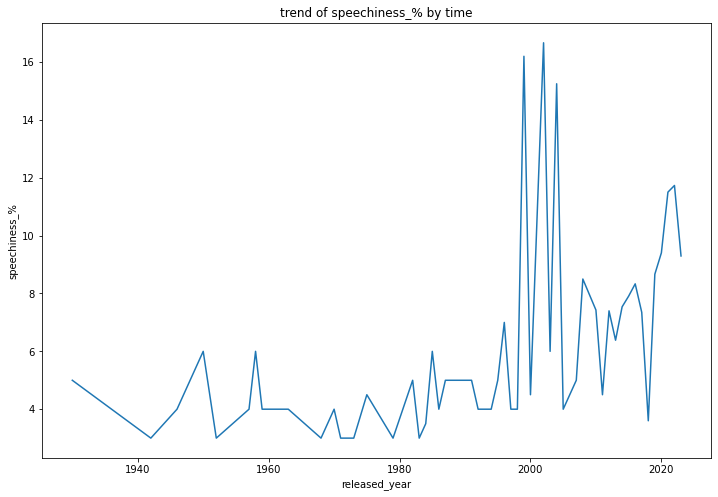

In [271]:
features1 = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
dp_time_grouped = df1.groupby('released_year')[features1].mean().reset_index()

for feature in features1:
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=dp_time_grouped, x='released_year', y=feature)
    plt.xlabel("released_year")
    plt.ylabel(feature)
    plt.title(f"trend of {feature} by time")
    plt.show()

- AS we can see from from the speechness graph as the time proceeded  speechness increaes that is number of words in lyrics increased

- Accousticness in songs was popular during 1940 to 1960 after that accousticness in the songs decreased

- energy of the songs was low during 1940 but from 1960 energy is songs also incresed

- Intial upto 1980 Instrumental content in the songs was very less it took a boom in 1980 and again falled in 200 and took boom in 2020 for a small period of time

- Live performance element was very high during 1980 but before and after it it is decreased

- During 1980-2000 most of the song produced are suitable for dancing after that it decresed slightly before that there were many songs which were suitable for dancing but during this period many songs produced which can be used for dancing

In [237]:
df1['mode']=df1['mode'].map({"Major":1,"Minor":0})

Encoding mode feature

In [238]:
df1['streams'].unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

In [239]:
df1[df1['streams']=="BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3"]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,0,54,0,0.0,110,A,1,53,75,69,7,0,17,3


In [240]:
df1.drop([574],inplace=True)

In [241]:
df1['streams'].astype('int64')

0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 952, dtype: int64

In [242]:
df2=df1.iloc[:,2:]


In [172]:
unique1=len(df1['track_name'].unique())
unique2=len(df1['artist(s)_name'].unique())
print("unique values in track_name:",unique1)
print("unique values in artist(s)_name:",unique2)

unique values in track_name: 942
unique values in artist(s)_name: 644


removing artist name and playlist because both columns unique value are very high  which in a regression task is not useful 

In [173]:
X=df2.drop(['streams'],axis=1)
Y=df2['streams'].astype('int64')

In [174]:
Y.dtype

dtype('int64')

In [175]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=42)

Splitting the data into train and test data


In [176]:
X_train_copy=X_train.drop(['key'],axis=1)
X_test_copy=X_test.drop(['key'],axis=1)

In [177]:
X_train_copy

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
316,1,2022,5,13,2128,9,37,88,9,0,14.0,120,1,73,64,85,25,0,61,3
696,2,2020,2,29,4890,20,52,42,100,0,0.0,93,1,74,59,87,3,0,8,5
212,2,2023,6,2,185,3,5,6,4,1,33.0,98,0,73,45,62,28,0,13,13
79,1,2023,6,22,370,20,12,16,18,4,93.0,98,1,68,40,79,33,0,30,6
148,1,2019,5,10,1507,14,24,71,44,1,195.0,120,1,60,24,35,73,0,31,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,2017,11,10,21097,52,384,135,1034,37,312.0,116,1,80,92,80,4,0,10,3
270,1,2019,8,23,1282,6,26,6,19,0,5.0,96,1,72,40,47,71,0,13,4
861,1,2022,5,13,514,0,5,36,1,0,0.0,154,0,70,97,62,47,0,10,4
435,1,2022,9,14,713,7,2,4,6,0,0.0,85,0,65,36,47,31,0,12,10


In [178]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

columns=['key']

nd_array = imputer.fit_transform(X_train[['key']])

X_train_copy1=pd.DataFrame(nd_array,columns=columns) 

nd_array1=imputer.transform(X_test[['key']])

X_test_copy1=pd.DataFrame(nd_array1,columns=columns)

In [179]:
from sklearn.impute import KNNImputer

import numpy as np

imputer=KNNImputer(n_neighbors=3,weights='uniform',missing_values=np.nan)

columns=X_train_copy.columns

nd_arrray=imputer.fit_transform(X_train_copy)

X_train_copy=pd.DataFrame(nd_arrray,columns=columns) 

nd_array1=imputer.transform(X_test_copy)

X_test_copy=pd.DataFrame(nd_array1,columns=columns) 

In [180]:
X_train=pd.concat([X_train_copy,X_train_copy1],axis=1)
X_test=pd.concat([X_test_copy,X_test_copy1],axis=1)

In [181]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

encoded_data_train = encoder.fit_transform(X_train[['key']])

encoded_feature_names = encoder.get_feature_names_out(['key'])

X_train_encoded = pd.concat([X_train, pd.DataFrame(encoded_data_train, columns=encoded_feature_names)], axis=1)

encoded_data_test = encoder.transform(X_test[['key']])

X_test_encoded = pd.concat([X_test, pd.DataFrame(encoded_data_test, columns=encoded_feature_names)], axis=1)

X_train_encoded=X_train_encoded[X_train_encoded["artist_count"].isna()!=True]

X_train_encoded.drop(["key"],axis=1,inplace=True)

X_test_encoded=X_test_encoded[X_test_encoded["artist_count"].isna()!=True]

X_test_encoded.drop(["key"],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

columns=X_train_encoded.columns

nd_array = scaler.fit_transform(X_train_encoded)

X_train_encoded=pd.DataFrame(X_train_encoded,columns=columns)

nd_array1 = scaler.transform(X_test_encoded)

X_test_encoded=pd.DataFrame(X_test_encoded,columns=columns)

In [92]:
X_train.isna().sum()

artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
key                     0
dtype: int64

In [93]:
X_train_encoded.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,1.0,2022.0,5.0,13.0,2128.0,9.0,37.0,88.0,9.0,0.0,14.0,120.0,1.0,73.0,64.0,85.0,25.0,0.0,61.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2020.0,2.0,29.0,4890.0,20.0,52.0,42.0,100.0,0.0,0.0,93.0,1.0,74.0,59.0,87.0,3.0,0.0,8.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2023.0,6.0,2.0,185.0,3.0,5.0,6.0,4.0,1.0,33.0,98.0,0.0,73.0,45.0,62.0,28.0,0.0,13.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2023.0,6.0,22.0,370.0,20.0,12.0,16.0,18.0,4.0,93.0,98.0,1.0,68.0,40.0,79.0,33.0,0.0,30.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2019.0,5.0,10.0,1507.0,14.0,24.0,71.0,44.0,1.0,195.0,120.0,1.0,60.0,24.0,35.0,73.0,0.0,31.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [104]:
X_train_encoded_copy

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,0.0,0.0,-0.166667,0.0000,-0.020765,0.358209,0.041667,0.660256,-0.203898,0.0,0.2625,-0.023952,0.0,0.137931,0.317881,0.826087,0.257143,0.0,3.266667,-0.428571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-1.0,-0.666667,1.0000,0.530698,1.014925,0.250000,0.070513,0.341829,0.0,-0.0875,-0.670659,0.0,0.183908,0.185430,0.913043,-0.371429,0.0,-0.266667,-0.142857,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.5,0.000000,-0.6875,-0.408705,0.000000,-0.402778,-0.391026,-0.233883,0.5,0.7375,-0.550898,-1.0,0.137931,-0.185430,-0.173913,0.342857,0.0,0.066667,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,0.000000,0.5625,-0.371768,1.014925,-0.305556,-0.262821,-0.149925,2.0,2.2375,-0.550898,0.0,-0.091954,-0.317881,0.565217,0.485714,0.0,1.200000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-1.5,-0.166667,-0.1875,-0.144754,0.656716,-0.138889,0.442308,0.005997,0.5,4.7875,-0.023952,0.0,-0.459770,-0.741722,-1.347826,1.628571,0.0,1.266667,-0.428571,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,2.0,-2.5,0.833333,-0.1875,3.766597,2.925373,4.861111,1.262821,5.943028,18.5,7.7125,-0.119760,0.0,0.459770,1.059603,0.608696,-0.342857,0.0,-0.133333,-0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
662,0.0,-1.5,0.333333,0.6250,-0.189678,0.179104,-0.111111,-0.391026,-0.143928,0.0,0.0375,-0.598802,0.0,0.091954,-0.317881,-0.826087,1.571429,0.0,0.066667,-0.285714,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
663,0.0,0.0,-0.166667,0.0000,-0.343017,-0.179104,-0.402778,-0.006410,-0.251874,0.0,-0.0875,0.790419,-1.0,0.000000,1.192053,-0.173913,0.885714,0.0,-0.133333,-0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
664,0.0,0.0,0.500000,0.0625,-0.303284,0.238806,-0.444444,-0.416667,-0.221889,0.0,-0.0875,-0.862275,-1.0,-0.229885,-0.423841,-0.826087,0.428571,0.0,0.000000,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [112]:
#XG BOOST (Boosting model)
model = xgb.XGBRegressor()

model.fit(X_train_encoded, Y_train)

feature_importance = model.feature_importances_

predicted=model.predict(X_test_encoded)

mae = mean_absolute_error(Y_test,predicted)

mse = mean_squared_error(Y_test,predicted)

rmse = np.sqrt(mse)

r_squared = r2_score(Y_test, predicted)

predict_train=model.predict(X_train_encoded)

r_squared1 = r2_score(Y_train,predict_train)

print("mean absoultue error before hyperparameter tunning:",mae)

print("mean squared error before hyperparameter tunning:",mse)

print("root mean square error before hyperparameter tunning:",rmse)

print(f"R-squared (R²) Score for test before hyperparameter tunning : {r_squared:.2f}")

print(f"R-squared (R²) Score for train before hyperparameter tunning: {r_squared1:.2f}")

mean absoultue error before hyperparameter tunning: 146843797.97902098
mean squared error before hyperparameter tunning: 5.587148203438392e+16
root mean square error before hyperparameter tunning: 236371491.5855631
R-squared (R²) Score for test before hyperparameter tunning : 0.82
R-squared (R²) Score for train before hyperparameter tunning: 1.00


In [113]:
#Linear regression 
model = LinearRegression()

model.fit(X_train_encoded,Y_train)

y_pred = model.predict(X_test_encoded)

r_squared = r2_score(Y_test, y_pred)

mae = mean_absolute_error(Y_test,predicted)

mse = mean_squared_error(Y_test,predicted)

rmse = np.sqrt(mse)

predict_train=model.predict(X_train_encoded)

r_squared1 = r2_score(Y_train,predict_train)

print(f"R-squared (R²) Score before hyper parameter tunning for test: {r_squared:.2f}")

print("mean absoultue error before hyperparameter tunning:",mae)

print("mean squared error before hyperparameter tunning:",mse)

print("root mean square error before hyperparameter tunning:",rmse)

print(f"R-squared (R²) Score for train before hyperparameter tunning: {r_squared1:.2f}")

R-squared (R²) Score before hyper parameter tunning for test: 0.76
mean absoultue error before hyperparameter tunning: 146843797.97902098
mean squared error before hyperparameter tunning: 5.587148203438392e+16
root mean square error before hyperparameter tunning: 236371491.5855631
R-squared (R²) Score for train before hyperparameter tunning: 0.74


In [117]:
#Random Forest(Bagging model)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train_encoded, Y_train)

Y_pred = model.predict(X_test_encoded)

mae = mean_absolute_error(Y_test,predicted)

mse = mean_squared_error(Y_test,predicted)

rmse = np.sqrt(mse)

r_squared = r2_score(Y_test, Y_pred)

predict_train=model.predict(X_train_encoded)

r_squared1 = r2_score(Y_train,predict_train)

print(f'Mean Squared Error: {mse}')

print(f"R-squared (R²) Score before hyper parameter tunning for test: {r_squared:.2f}")


print("mean absoultue error before hyperparameter tunning:",mae)

print("mean squared error before hyperparameter tunning:",mse)

print("root mean square error before hyperparameter tunning:",rmse)

print(f"R-squared (R²) Score for train before hyperparameter tunning: {r_squared1:.2f}")

Mean Squared Error: 5.587148203438392e+16
R-squared (R²) Score before hyper parameter tunning for test: 0.84
mean absoultue error before hyperparameter tunning: 146843797.97902098
mean squared error before hyperparameter tunning: 5.587148203438392e+16
root mean square error before hyperparameter tunning: 236371491.5855631
R-squared (R²) Score for train before hyperparameter tunning: 0.97


In [205]:
#Hyper parameter tunning on xg boost

parameter={
     'n_estimators':[20,50,70,100],
     'max_depth' :[3,5,7],
     'max_leaves' :[2,5,7],
    'learning_rate':[1e-3,1e-2,1e-1,1]
}

model1=GridSearchCV(xgb.XGBRegressor(random_state=42),param_grid=parameter,cv=5)

model1.fit(X_train_encoded,Y_train)

best_estimator=model1.best_params_

learning_rate=best_estimator['learning_rate']

max_depth=best_estimator['max_depth']

max_leaves=best_estimator['max_leaves']
                   
n_estimatiors=best_estimator['n_estimators']

best_model = model1.best_estimator_

Y_pred1 = best_model.predict(X_test_encoded)

mae = mean_absolute_error(Y_test,predicted)

mse = mean_squared_error(Y_test,predicted)

rmse = np.sqrt(mse)

r_squared = r2_score(Y_test, Y_pred1)

predict_train=model1.predict(X_train_encoded)

r_squared1 = r2_score(Y_train,predict_train)


print(f"R-squared (R²) Score before hyper parameter tunning for test: {r_squared:.2f}")

print("mean absoultue error before hyperparameter tunning:",mae)

print("mean squared error before hyperparameter tunning:",mse)

print("root mean square error before hyperparameter tunning:",rmse)

print(f"R-squared (R²) Score for train before hyperparameter tunning: {r_squared1:.2f}")
                   
print("1.learning rate:",learning_rate)

print("2.max depth:",max_depth)

print("3.max_leaves:",max_leaves)

print("4.n_estimators:",n_estimatiors)

R-squared (R²) Score before hyper parameter tunning for test: 0.84
mean absoultue error before hyperparameter tunning: 146843797.97902098
mean squared error before hyperparameter tunning: 5.587148203438392e+16
root mean square error before hyperparameter tunning: 236371491.5855631
R-squared (R²) Score for train before hyperparameter tunning: 0.93
1.learning rate: 0.1
2.max depth: 3
3.max_leaves: 5
4.n_estimators: 100


In [192]:
#hyper parameter tunning on Linear regression

parameter={
    'fit_intercept':[True,False]
}

model2=GridSearchCV(LinearRegression(),param_grid=parameter,cv=5)

model2.fit(X_train_encoded,Y_train)

best_estimator=model2.best_params_

fit_intercept=best_estimator['fit_intercept']

best_model = model2.best_estimator_

Y_pred = best_model.predict(X_test_encoded)

mae = mean_absolute_error(Y_test,predicted)

mse = mean_squared_error(Y_test,predicted)

rmse = np.sqrt(mse)

r_squared = r2_score(Y_test, Y_pred)

predict_train=model2.predict(X_train_encoded)

r_squared1 = r2_score(Y_train,predict_train)

print(f"R-squared (R²) Score before hyper parameter tunning for test: {r_squared:.2f}")

print("mean absoultue error before hyperparameter tunning:",mae)

print("mean squared error before hyperparameter tunning:",mse)

print("root mean square error before hyperparameter tunning:",rmse)

print(f"R-squared (R²) Score for train before hyperparameter tunning: {r_squared1:.2f}")

print("fit_intercept:",fit_intercept)

R-squared (R²) Score before hyper parameter tunning for test: 0.76
mean absoultue error before hyperparameter tunning: 146843797.97902098
mean squared error before hyperparameter tunning: 5.587148203438392e+16
root mean square error before hyperparameter tunning: 236371491.5855631
R-squared (R²) Score for train before hyperparameter tunning: 0.74
fit_intercept: False


In [195]:
#Hyper parameter tunning on random forest

parameter={
    'n_estimators':[20,50,70,100,120],
    'max_depth' :[7,10,12],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,2,4,5],
    'max_features':['auto','sqrt']
}

model3=GridSearchCV(RandomForestRegressor(random_state=42),param_grid=parameter,cv=5)

model3.fit(X_train_encoded,Y_train)

best_estimator=model3.best_params_

n_estimators=best_estimator['n_estimators']

max_depth=best_estimator['max_depth']

min_samples_split=best_estimator['min_samples_split']

min_samples_leaf=best_estimator['min_samples_leaf']

max_features=best_estimator['max_features']

best_model = model3.best_estimator_

Y_pred = best_model.predict(X_test_encoded)

mae = mean_absolute_error(Y_test,predicted)

mse = mean_squared_error(Y_test,predicted)

rmse = np.sqrt(mse)

r_squared = r2_score(Y_test, Y_pred)

predict_train=model.predict(X_train_encoded)

r_squared1 = r2_score(Y_train,predict_train)

print(f"R-squared (R²) Score before hyper parameter tunning for test: {r_squared:.2f}")

print("mean absoultue error before hyperparameter tunning:",mae)

print("mean squared error before hyperparameter tunning:",mse)

print("root mean square error before hyperparameter tunning:",rmse)

print(f"R-squared (R²) Score for train before hyperparameter tunning: {r_squared1:.2f}")
                   
print("1.n_estimators:",n_estimators)

print("2.max depth:",max_depth)

print("3.max_sample_split:",min_samples_split)

print("4.min_sample_leaf:",min_samples_leaf)

print("5.max_features:",max_features)

R-squared (R²) Score before hyper parameter tunning for test: 0.84
mean absoultue error before hyperparameter tunning: 146843797.97902098
mean squared error before hyperparameter tunning: 5.587148203438392e+16
root mean square error before hyperparameter tunning: 236371491.5855631
R-squared (R²) Score for train before hyperparameter tunning: 0.95
1.n_estimators: 120
2.max depth: 10
3.max_sample_split: 2
4.min_sample_leaf: 2
5.max_features: auto


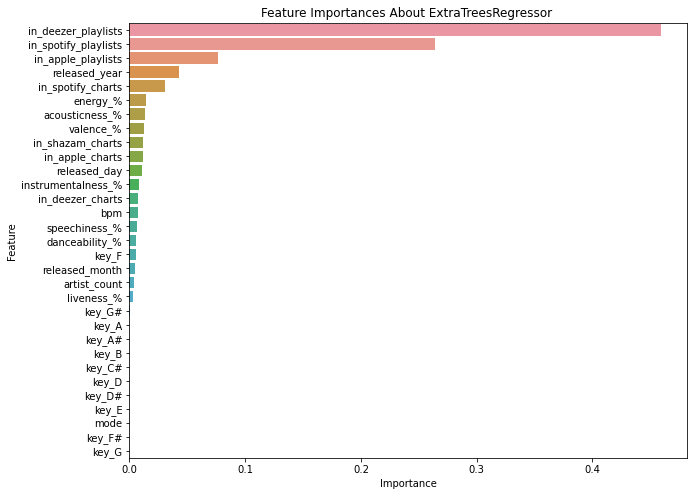

In [202]:
feature_importances = model1.best_estimator_.feature_importances_

columns=X_train_encoded.columns

df_important = pd.DataFrame({'Feature': columns, 'Importance': feature_importances})

df_important = df_important.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x='Importance', y='Feature', data=df_important)

plt.title('Feature Importances About ExtraTreesRegressor ')

plt.show()

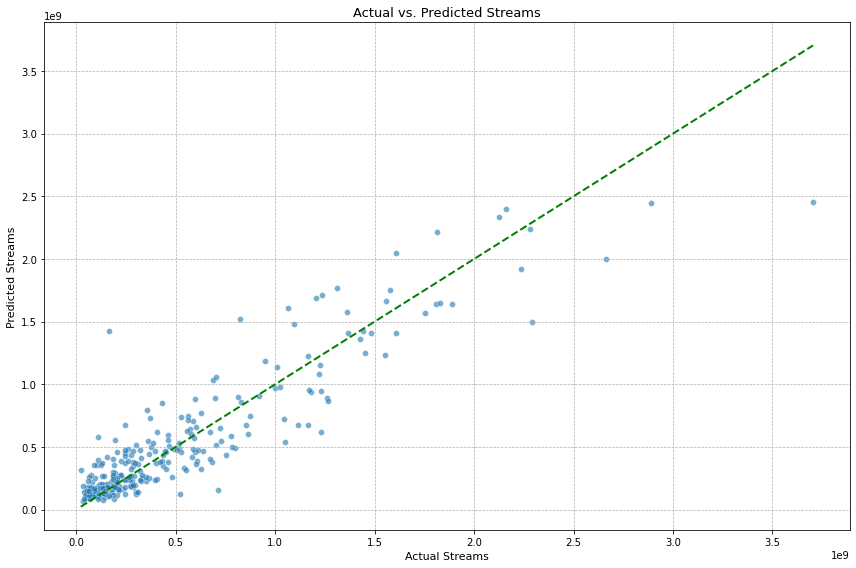

In [206]:
#Actual vs predicted after grid_search_cv
plt.figure(figsize=(12, 8))
sns.scatterplot(x=Y_test, y=Y_pred1, alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='green', linestyle='--', lw=2)
plt.xlabel('Actual Streams', fontsize=11)
plt.ylabel('Predicted Streams', fontsize=11)
plt.title('Actual vs. Predicted Streams', fontsize=13)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [260]:
df2['streams']=df2['streams'].astype('int64')

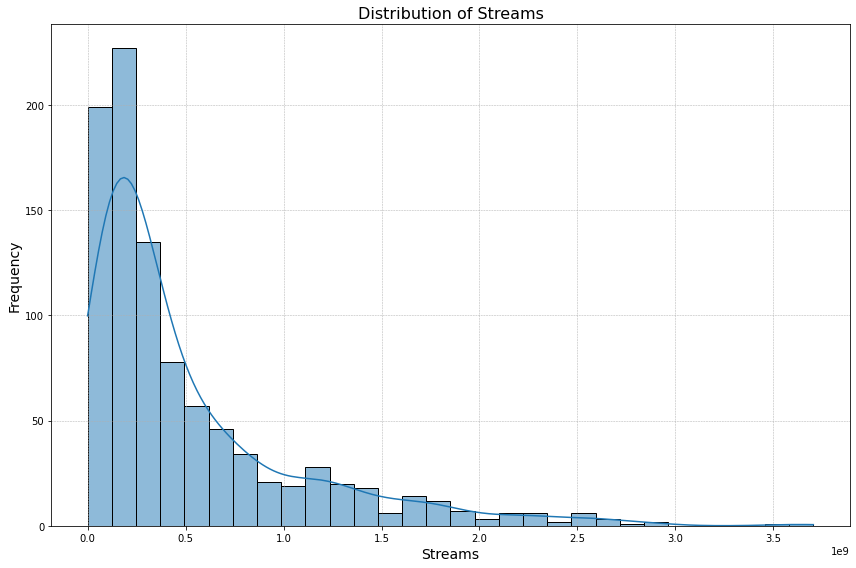

In [259]:
plt.figure(figsize=(12, 8))
num_bins=30
hist, bin_edges = np.histogram(df2['streams'], bins=num_bins)
sns.histplot(data=df2['streams'], bins=bin_edges,kde=True)
plt.title('Distribution of Streams', fontsize=16)
plt.xlabel('Streams', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()